In [2]:
! pip install plotnine


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# https://realpython.com/ggplot-python/
from plotnine.data import economics
from plotnine import ggplot, aes, geom_line

economics

(
        ggplot(economics)  # What data to use
        + aes(x="date", y="pop")  # What variable to use
        + geom_line()  # Geometric object to use for drawing
)

In [3]:
from data import csv_data
import pandas as pd

csv_data

csv_data['Add Rate'] = csv_data['Item Count'] * 1_000_000_000 / csv_data['Add Duration Nanos']

csv_data


,Class,Test,Display,Timestamp,Range,Queries,Scenario,Item Count,Item Count.1,Add Duration Nanos,Query Count,Search Duration Nanos,Add Rate
0,io.nanovc.indexing.examples.x.XIndex1DTests$Hi...,index_Random_Linear,"[1] Random Linear Sampling Scenario = Warmup, ...",2023-11-29T21:45:01.1467035,1000000.0,20000,Warmup,20000,20000,3994100,20000,38580600,5.007386e+06
1,io.nanovc.indexing.examples.x.XIndex1DTests$Hi...,index_Random_Linear,[2] Random Linear Sampling Scenario = Tiny Few...,2023-11-29T21:45:01.1467035,1000000.0,1000,Tiny Few,1000,1000,374900,1000,287000,2.667378e+06
2,io.nanovc.indexing.examples.x.XIndex1DTests$Hi...,index_Random_Linear,[3] Random Linear Sampling Scenario = Tiny Few...,2023-11-29T21:45:01.1467035,1000000.0,1000,Tiny Few,2000,2000,728800,1000,817200,2.744237e+06
3,io.nanovc.indexing.examples.x.XIndex1DTests$Hi...,index_Random_Linear,[4] Random Linear Sampling Scenario = Tiny Few...,2023-11-29T21:45:01.1467035,1000000.0,1000,Tiny Few,3000,3000,982400,1000,1039200,3.053746e+06
4,io.nanovc.indexing.examples.x.XIndex1DTests$Hi...,index_Random_Linear,[5] Random Linear Sampling Scenario = Tiny Few...,2023-11-29T21:45:01.1467035,1000000.0,1000,Tiny Few,4000,4000,969800,1000,714800,4.124562e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,io.nanovc.indexing.examples.x.XIndex1DTests$Hi...,index_Random_Linear,[149] Random Linear Sampling Scenario = Large ...,2023-11-29T21:45:01.1467035,1000000.0,1000000,Large Lots,7000000,7000000,2033671000,1000000,136092100,3.442051e+06
149,io.nanovc.indexing.examples.x.XIndex1DTests$Hi...,index_Random_Linear,[150] Random Linear Sampling Scenario = Large ...,2023-11-29T21:45:01.1467035,1000000.0,1000000,Large Lots,8000000,8000000,2347077200,1000000,138844900,3.408495e+06
150,io.nanovc.indexing.examples.x.XIndex1DTests$Hi...,index_Random_Linear,[151] Random Linear Sampling Scenario = Large ...,2023-11-29T21:45:01.1467035,1000000.0,1000000,Large Lots,9000000,9000000,2580564100,1000000,207305600,3.487610e+06
151,io.nanovc.indexing.examples.x.XIndex1DTests$Hi...,index_Random_Linear,[152] Random Linear Sampling Scenario = Huge L...,2023-11-29T21:45:01.1467035,1000000.0,1000000,Huge Lots,10000000,10000000,3096995500,1000000,147523800,3.228936e+06


In [4]:

# https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_tile.html#annotated-heatmap

scenarios = csv_data['Scenario'].unique()

plot_data = csv_data.copy()

plot_data['scenario'] = pd.Categorical(plot_data['Scenario'], categories = scenarios)
plot_data.head()




,Class,Test,Display,Timestamp,Range,Queries,Scenario,Item Count,Item Count.1,Add Duration Nanos,Query Count,Search Duration Nanos,Add Rate,scenario
0,io.nanovc.indexing.examples.x.XIndex1DTests$Hi...,index_Random_Linear,"[1] Random Linear Sampling Scenario = Warmup, ...",2023-11-29T21:45:01.1467035,1000000.0,20000,Warmup,20000,20000,3994100,20000,38580600,5.007386e+06,Warmup
1,io.nanovc.indexing.examples.x.XIndex1DTests$Hi...,index_Random_Linear,[2] Random Linear Sampling Scenario = Tiny Few...,2023-11-29T21:45:01.1467035,1000000.0,1000,Tiny Few,1000,1000,374900,1000,287000,2.667378e+06,Tiny Few
2,io.nanovc.indexing.examples.x.XIndex1DTests$Hi...,index_Random_Linear,[3] Random Linear Sampling Scenario = Tiny Few...,2023-11-29T21:45:01.1467035,1000000.0,1000,Tiny Few,2000,2000,728800,1000,817200,2.744237e+06,Tiny Few
3,io.nanovc.indexing.examples.x.XIndex1DTests$Hi...,index_Random_Linear,[4] Random Linear Sampling Scenario = Tiny Few...,2023-11-29T21:45:01.1467035,1000000.0,1000,Tiny Few,3000,3000,982400,1000,1039200,3.053746e+06,Tiny Few
4,io.nanovc.indexing.examples.x.XIndex1DTests$Hi...,index_Random_Linear,[5] Random Linear Sampling Scenario = Tiny Few...,2023-11-29T21:45:01.1467035,1000000.0,1000,Tiny Few,4000,4000,969800,1000,714800,4.124562e+06,Tiny Few


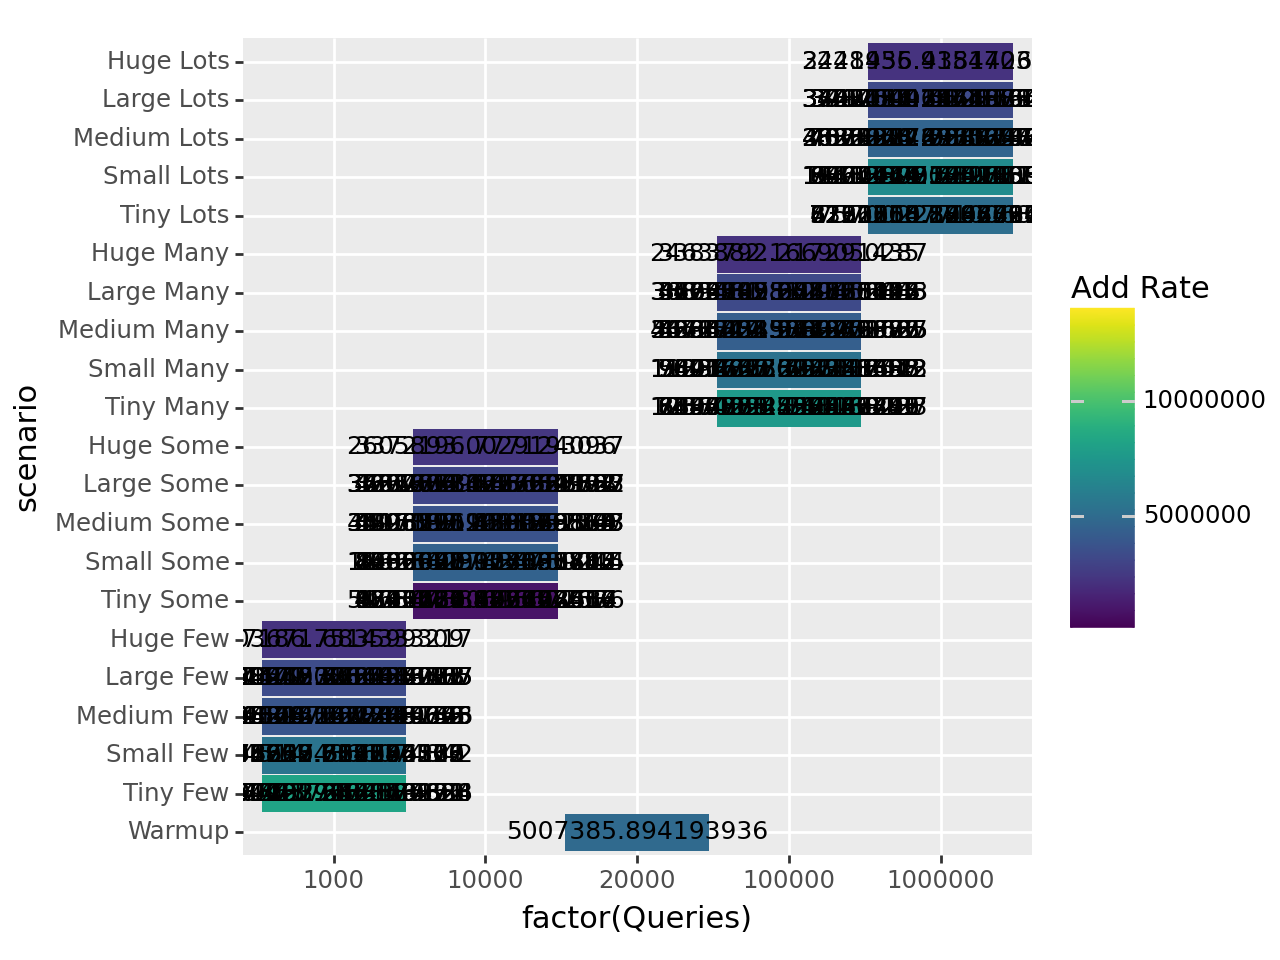

<Figure Size: (640 x 480)>

In [5]:
# https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_tile.html#annotated-heatmap
from plotnine import ggplot, aes, geom_tile, geom_text

# We use 'factor(year)' -- a discrete -- instead of 'year' so that all the years
# are displayed along the x-axis.
# The .95s create spacing between the tiles.

(ggplot(plot_data, aes('factor(Queries)', 'scenario', fill='Add Rate'))
 + geom_tile(aes(width=.95, height=.95))
 + geom_text(aes(label='Add Rate'), size=9)
 )

In [6]:
# https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_tile.html#annotated-heatmap
from plotnine import ggplot, aes, geom_tile, geom_text

# We use 'factor(year)' -- a discrete -- instead of 'year' so that all the years
# are displayed along the x-axis.
# The .95s create spacing between the tiles.

(ggplot(plot_data, aes('factor("Add Rate")', 'scenario', fill='Add Rate'))
 + geom_tile(aes(width=.95, height=.95))
 + geom_text(aes(label='Add Rate'), size=9)
 )

PlotnineError: 'Could not evaluate the \'x\' mapping: \'factor("Add Rate")\' (original error: Categorical input must be list-like)'

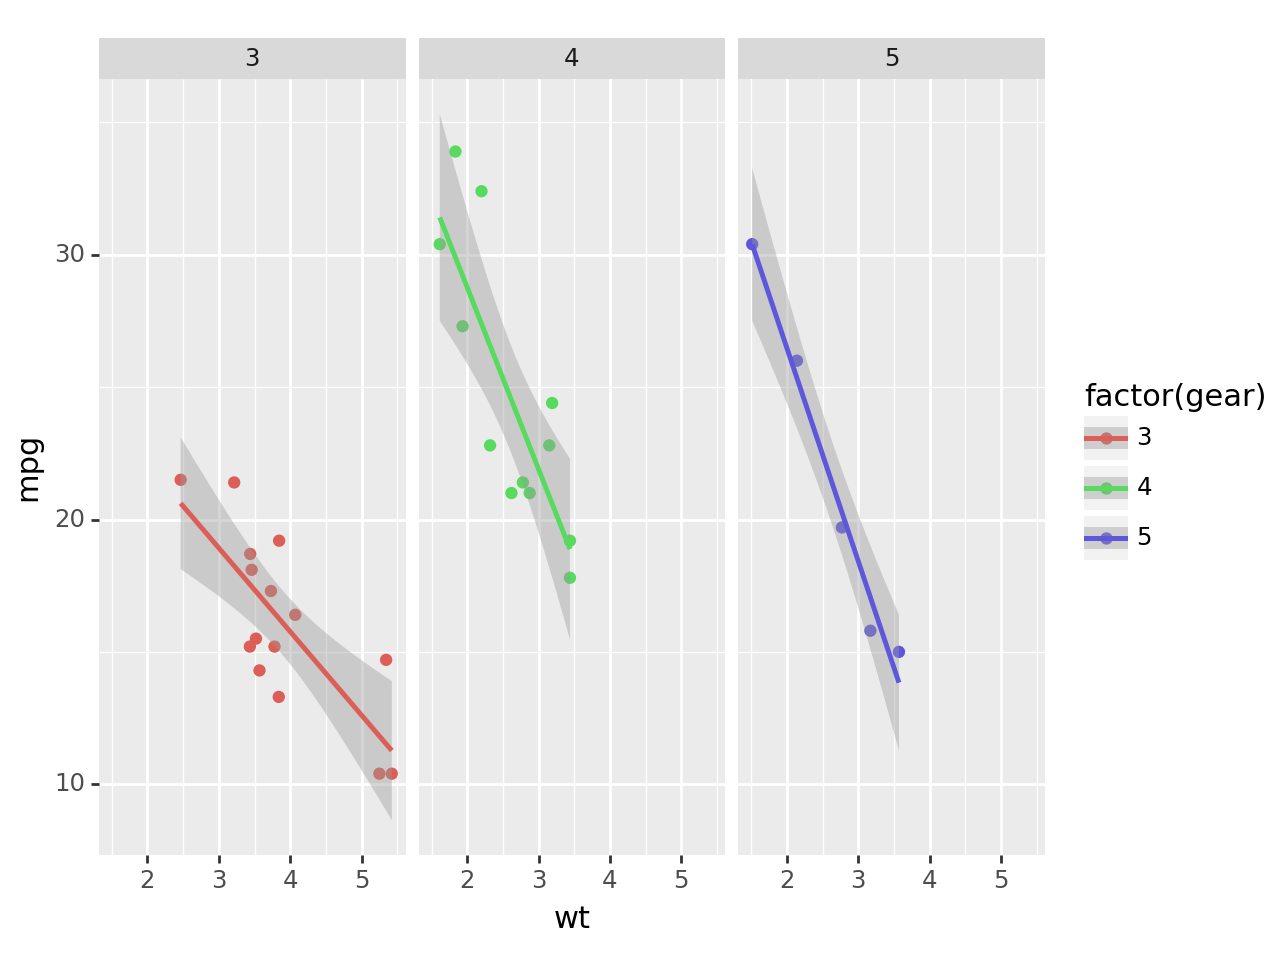

<Figure Size: (640 x 480)>

In [7]:
# https://plotnine.readthedocs.io/en/stable/index.html
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine.data import mtcars

(ggplot(mtcars, aes("wt", "mpg", color="factor(gear)"))
 + geom_point()
 + stat_smooth(method="lm")
 + facet_wrap("~gear"))

In [8]:
mtcars

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [9]:
plot_data.head()

,Class,Test,Display,Timestamp,Range,Queries,Scenario,Item Count,Item Count.1,Add Duration Nanos,Query Count,Search Duration Nanos,Add Rate,scenario
0,io.nanovc.indexing.examples.x.XIndex1DTests$Hi...,index_Random_Linear,"[1] Random Linear Sampling Scenario = Warmup, ...",2023-11-29T21:45:01.1467035,1000000.0,20000,Warmup,20000,20000,3994100,20000,38580600,5.007386e+06,Warmup
1,io.nanovc.indexing.examples.x.XIndex1DTests$Hi...,index_Random_Linear,[2] Random Linear Sampling Scenario = Tiny Few...,2023-11-29T21:45:01.1467035,1000000.0,1000,Tiny Few,1000,1000,374900,1000,287000,2.667378e+06,Tiny Few
2,io.nanovc.indexing.examples.x.XIndex1DTests$Hi...,index_Random_Linear,[3] Random Linear Sampling Scenario = Tiny Few...,2023-11-29T21:45:01.1467035,1000000.0,1000,Tiny Few,2000,2000,728800,1000,817200,2.744237e+06,Tiny Few
3,io.nanovc.indexing.examples.x.XIndex1DTests$Hi...,index_Random_Linear,[4] Random Linear Sampling Scenario = Tiny Few...,2023-11-29T21:45:01.1467035,1000000.0,1000,Tiny Few,3000,3000,982400,1000,1039200,3.053746e+06,Tiny Few
4,io.nanovc.indexing.examples.x.XIndex1DTests$Hi...,index_Random_Linear,[5] Random Linear Sampling Scenario = Tiny Few...,2023-11-29T21:45:01.1467035,1000000.0,1000,Tiny Few,4000,4000,969800,1000,714800,4.124562e+06,Tiny Few


C:\Mach\Source\nanovc-java-kdrepo\venv\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


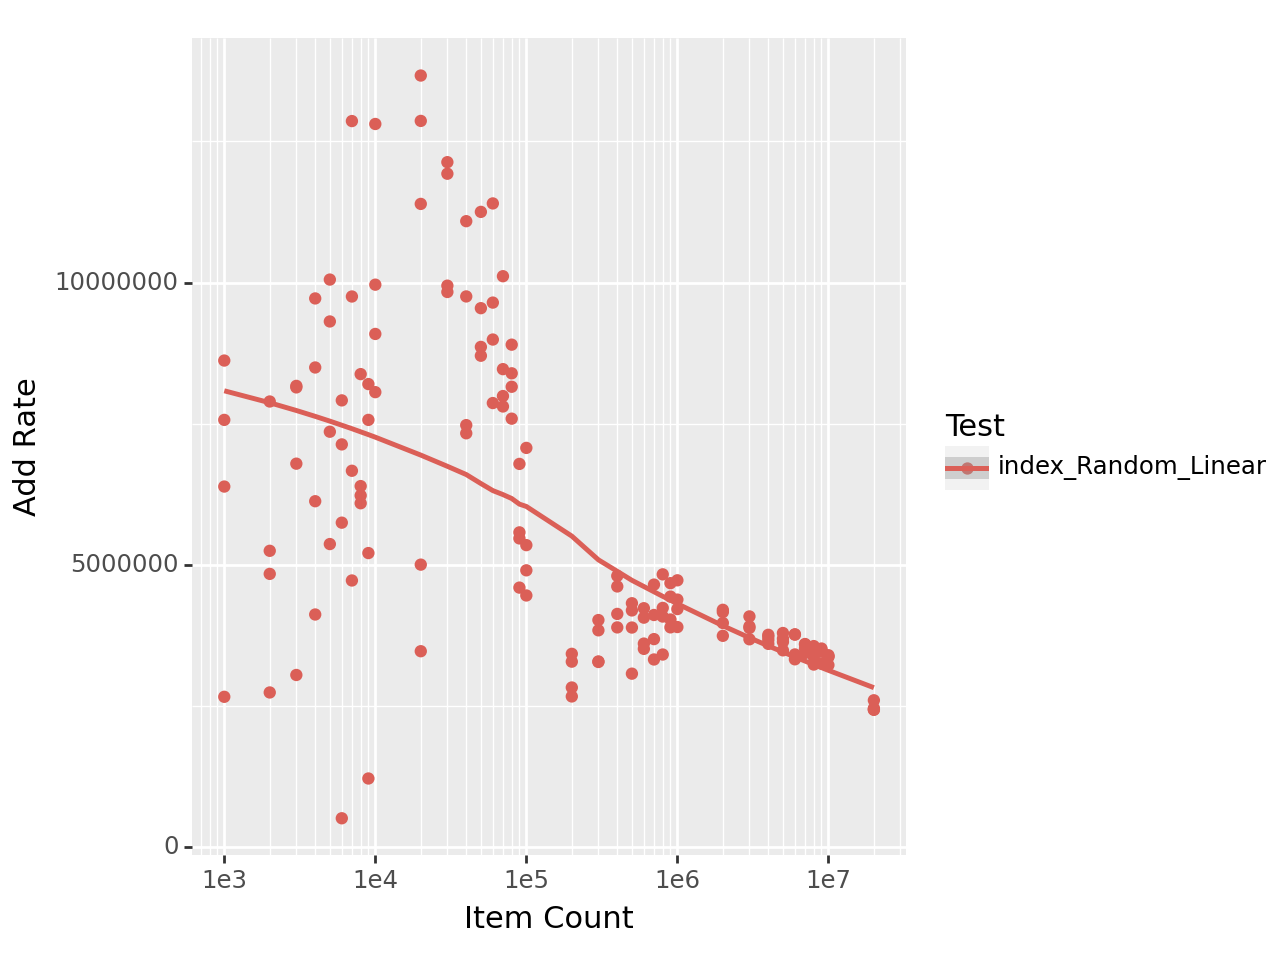

<Figure Size: (640 x 480)>

In [67]:
from plotnine import scale_x_log10, scale_y_log10, geom_smooth, labs, scale_color_discrete

(ggplot(plot_data, aes(x="Item Count", y="Add Rate", color="Test"))
 + geom_point()
 + scale_x_log10()
 #+ scale_y_log10()
 #+ scale_color_discrete(l=.4)
 + geom_smooth()
 + labs(x='Item Count', y='Add Rate')
 )

In [66]:
from plotnine import scale_x_log10, scale_y_log10, geom_smooth, labs, scale_color_discrete, scale_color_continuous

(ggplot(plot_data, aes('Item Count', "Add Rate", color="factor('scenario')"))
 + geom_point()
 + scale_x_log10()
 #+ scale_y_log10()
 #+ scale_color_continuous( l=.9)
 + geom_smooth()
 + labs(x='Item Count', y='Add Rate')
 )

PlotnineError: "Could not evaluate the 'color' mapping: 'factor('scenario')' (original error: Categorical input must be list-like)"